In [87]:
import healpy as hp
from astropy.coordinates import SkyCoord
from astropy import units as u
from DS_healpix_fragmentation import one_pixel_fragmentation 
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import gaussian

In [44]:
nside=128

In [45]:
hp.nside2resol(nside, arcmin=True)

27.483891294539248

In [47]:
sc = SkyCoord(ra=195*u.degree, dec=28*u.degree, frame='icrs')

In [48]:
sc.galactic.l.degree, sc.galactic.b.degree

(58.098776185577854, 87.91182910616892)

In [49]:
ipix=hp.ang2pix(nside=nside, nest=True, 
           theta=sc.galactic.l.degree, phi=sc.galactic.b.degree, lonlat=True)
ipix

16369

In [51]:
ang = hp.pix2ang(nside=nside, ipix=ipix, nest=True, lonlat=True)
ang

(52.5, 87.80696888064219)

In [52]:
sc1 = SkyCoord(l=ang[0]*u.degree, b=ang[1]*u.degree, frame='galactic')

In [53]:
sc1.icrs.ra.degree, sc1.icrs.dec.degree

(195.19647726428298, 27.843382111025186)

In [80]:
f_matr = one_pixel_fragmentation(nside, ipix, 11)

In [41]:
coma_hdul = fits.open('/home/rt2122/Data/coma_sweep/south/sweep-190p025-200p030.fits')

In [42]:
ra = coma_hdul[1].data['RA']
dec = coma_hdul[1].data['DEC']
flux_g = coma_hdul[1].data['FLUX_G']
flux_r = coma_hdul[1].data['FLUX_R']
flux_z = coma_hdul[1].data['FLUX_Z']

In [64]:
sc = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')

In [81]:
pixels = hp.ang2pix(nside=nside*2**11, nest=True, 
                    theta=sc.galactic.l.degree, phi=sc.galactic.b.degree, lonlat=True)

In [82]:
pic = np.zeros(list(f_matr.shape) + [3], dtype=np.float64)

In [83]:
dict_pix = {}
for i in range(f_matr.shape[0]):
    for j in range(f_matr.shape[0]):
        dict_pix.update({f_matr[i, j] : (i, j)})

In [84]:
f_matr.shape

(2048, 2048)

In [85]:
for k in range(pixels.shape[0]):
    if pixels[k] in dict_pix:
        i, j = dict_pix[pixels[k]]
        for ch, flux in enumerate((flux_g, flux_r, flux_z)):
            pic[i, j, ch] = max(pic[i, j, ch], flux[k])

In [71]:
pixels

array([17073288888, 17073290264, 17073290304, ..., 17027874559,
       17027120398, 17027872979])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


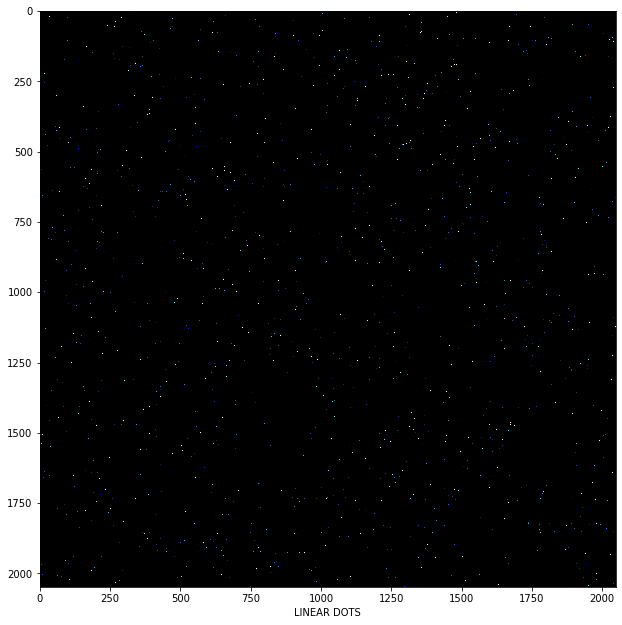

In [86]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('LINEAR DOTS')

im = ax.imshow(pic, cmap=plt.get_cmap('viridis'), 
               interpolation='nearest', vmin=0, vmax=1)

In [88]:
pic = gaussian(pic, 1)

/home/rt2122/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  """Entry point for launching an IPython kernel.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


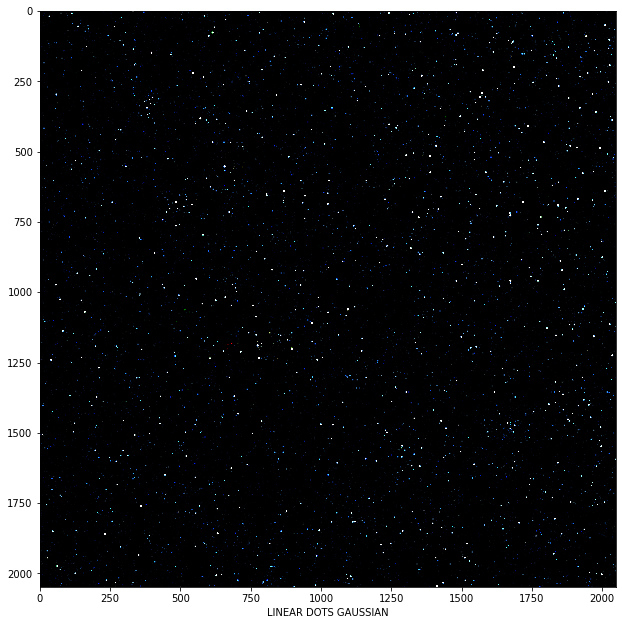

In [89]:
fig= plt.figure(figsize=(10,10))
ax= fig.add_axes([0.1,0.1,0.8,0.8])
plt.xlabel('LINEAR DOTS GAUSSIAN')

im = ax.imshow(pic, cmap=plt.get_cmap('viridis'), 
               interpolation='nearest', vmin=0, vmax=1)